In [19]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras.backend as k

In [4]:
df = pd.read_csv("data/cansim.csv")

In [6]:
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [7]:
df['Adjustments'] = pd.to_datetime(df['Adjustments'])+MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


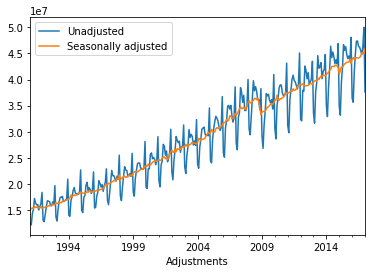

In [8]:
df.plot()

In [9]:
split_date = pd.Timestamp('01-01-2011')

In [11]:
train = df.loc[:split_date,['Unadjusted']]
test = df.loc[split_date:,['Unadjusted']]

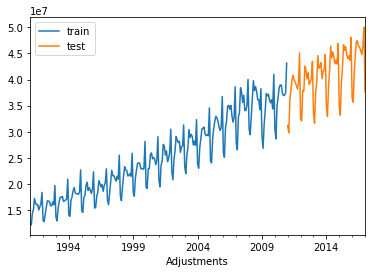

In [15]:
ax= train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

In [17]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [18]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]


In [20]:
model = Sequential()
model.add(Dense(12,input_dim=1,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [22]:
early_stop = EarlyStopping(monitor='loss',patience=1,verbose=1)

In [23]:
model.fit(X_train,y_train,epochs=200,batch_size=2,verbose=1,callbacks=[early_stop])

Epoch 1/200
120/120 [==============================] - 0s 713us/step - loss: 0.0574
Epoch 2/200
120/120 [==============================] - 0s 695us/step - loss: 0.0168
Epoch 3/200
120/120 [==============================] - 0s 691us/step - loss: 0.0141
Epoch 4/200
120/120 [==============================] - 0s 664us/step - loss: 0.0125
Epoch 5/200
120/120 [==============================] - 0s 688us/step - loss: 0.0111
Epoch 6/200
120/120 [==============================] - 0s 711us/step - loss: 0.0105
Epoch 7/200
120/120 [==============================] - 0s 663us/step - loss: 0.0101
Epoch 8/200
120/120 [==============================] - 0s 671us/step - loss: 0.0102
Epoch 00008: early stopping


In [24]:
y_pred = model.predict(X_test)

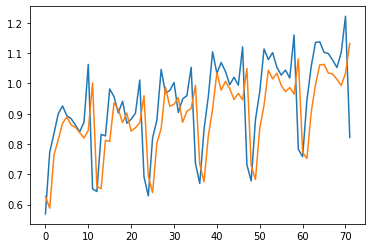

In [25]:
plt.plot(y_test)
plt.plot(y_pred)